## 0. Importando Bibliotecas

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import itertools
from itertools import permutations

## 1. Definindo cenários

### 1.1. Define 3 matrizes para problema

#### Matriz Complexa

In [2]:
row_1 = [0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
row_2 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
row_3 = [0, 0, 0, 0, 0, -100, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
row_4 = [0, 0, -100, 0, 0, 0.5, 0.6, 0.7, 0.8, -100, 0.8, 0.8, 0.8]
row_5 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_6 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_7 = [0, 0, 0, 0, -100, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.8]
row_8 = [0, -100, 0, 0, 0, 0.5, 0.6, 0.7, -100, 0.8, 0.8, 0.8, 0.8]
row_9 = [0, 0, 0, 0, 0, 0.5, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]

matrix_complex = np.matrix([row_1, row_2, row_3, row_4, row_5, row_6, row_7, row_8, row_9])

#### Matriz Simples

In [3]:
row_1 = [0, 0, 0, 0, 0]
row_2 = [0, 0, 0, 0, 0]
row_3 = [0, 0, -100, 0.5, 0.5]
row_4 = [0, 0, 0.5, 0.9, 0.9]
row_5 = [0, 0, 0.5, 0.9, 0.9]

matrix_simple = np.matrix([row_1, row_2, row_3, row_4, row_5])

#### Matriz Extra Simples

In [4]:
row_1 = [0, 0, 0]
row_2 = [0, 0, 0]
row_3 = [0, -100, 0.5]
row_4 = [0, 0.5, 0.9]

matrix_extra_simple = np.matrix([row_1, row_2, row_3, row_4])

### 1.2. Plota Matrizes

#### Plota Matriz Complexa

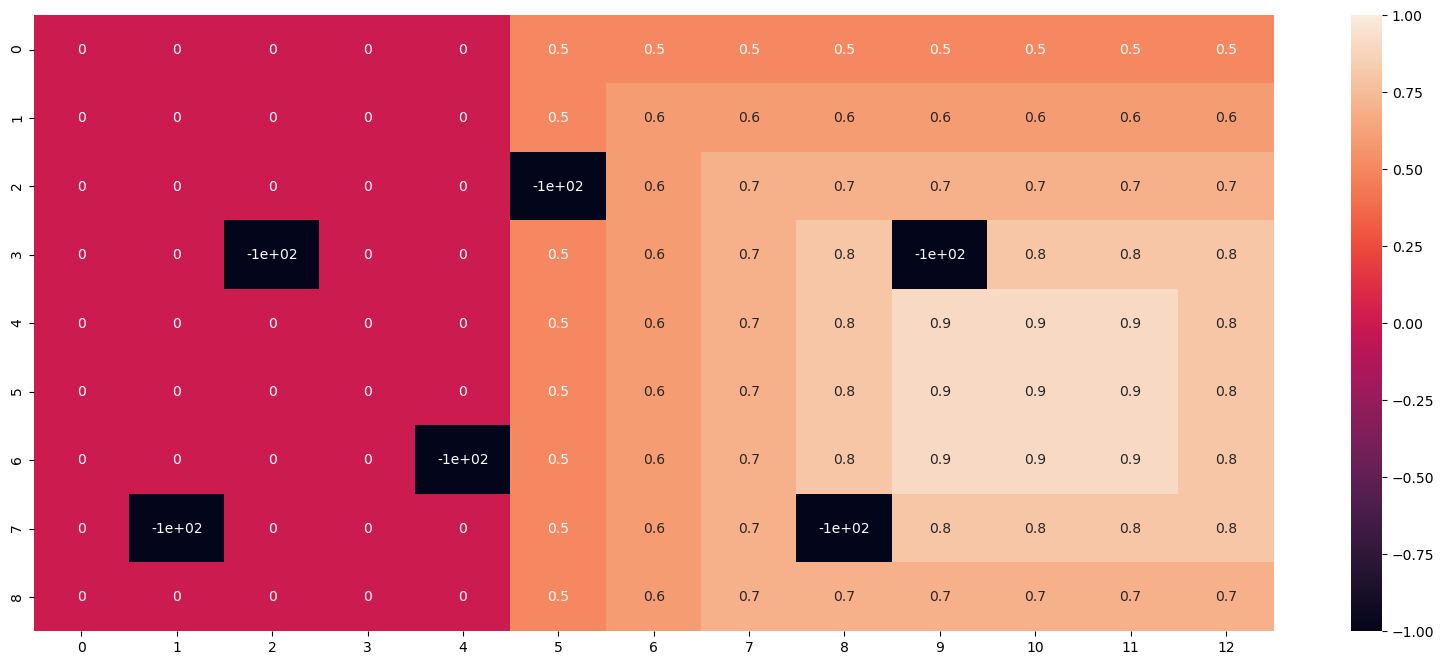

In [5]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_complex, vmin=-1, vmax=1, annot=True)

#### Plota Matriz Simples

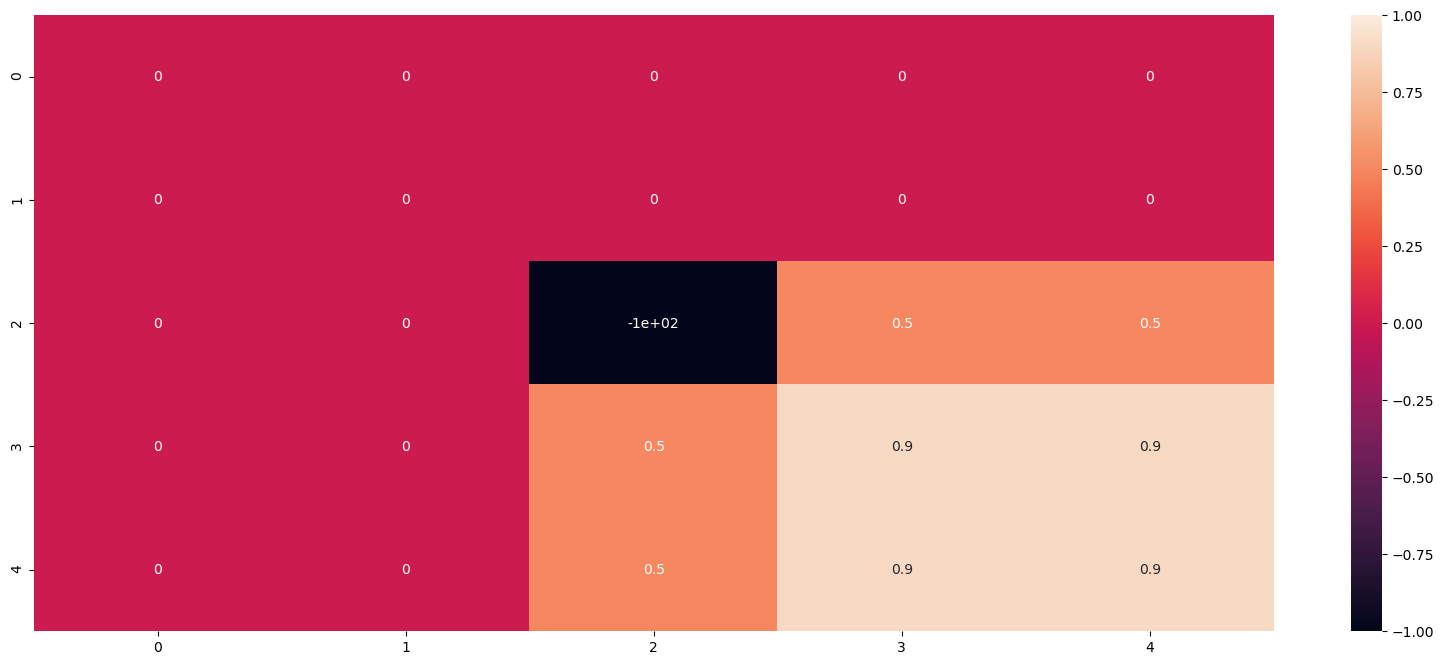

In [6]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_simple, vmin=-1, vmax=1, annot=True)

#### Plota Matriz Extra Simples

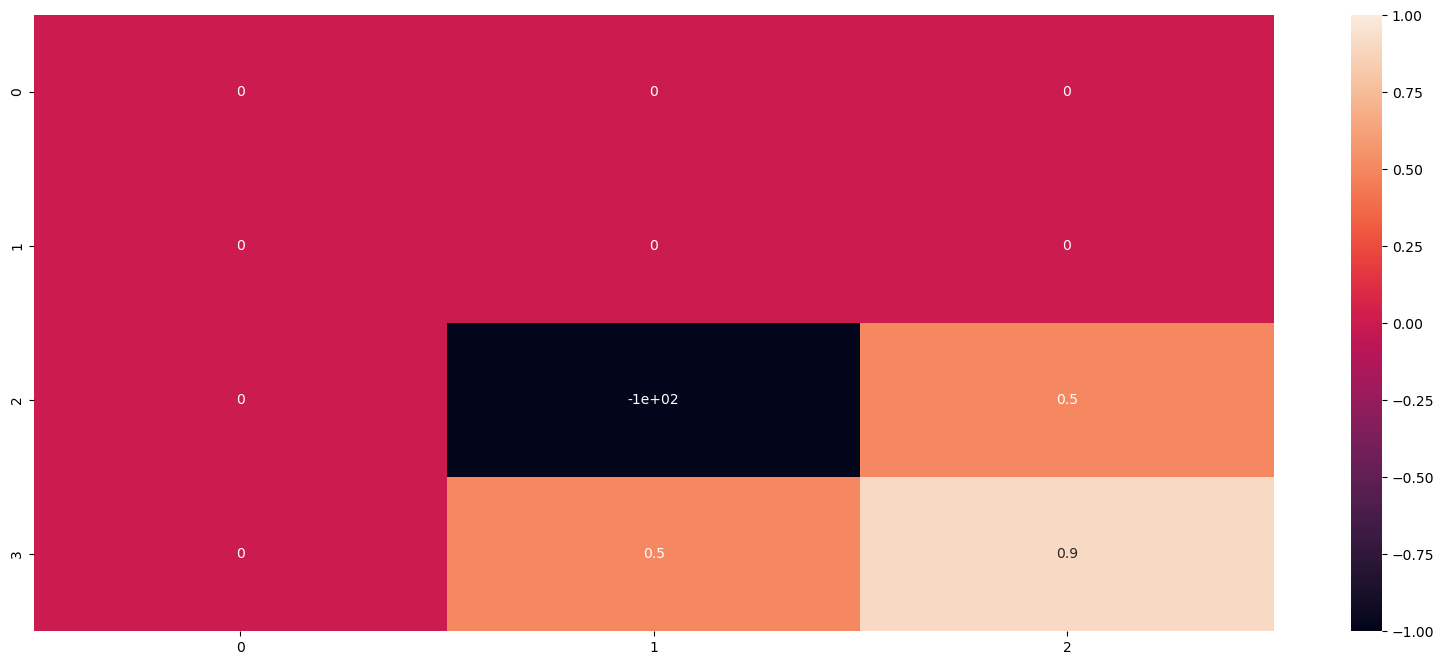

In [7]:
fig, ax = plt.subplots(figsize=(20,8))  

sns.heatmap(matrix_extra_simple, vmin=-1, vmax=1, annot=True)

## 2. Define Classes de Estado e Agente

In [8]:
# global variables
MATRIX_GAME = matrix_simple
START = (0, 0)
DETERMINISTIC = True

game  0  ended in:
3.748276948928833
game  1  ended in:
2.076784610748291
game  2  ended in:
2.1186912059783936
game  3  ended in:
0.8673403263092041
game  4  ended in:
1.2781124114990234
game  5  ended in:
0.9321396350860596
game  6  ended in:
0.27016186714172363
game  7  ended in:
1.9713923931121826
game  8  ended in:
0.8956785202026367
game  9  ended in:
3.4094011783599854
game  10  ended in:
1.5336413383483887
game  11  ended in:
1.3196136951446533
game  12  ended in:
0.9330189228057861
game  13  ended in:
0.6079974174499512
game  14  ended in:
0.27300596237182617
game  15  ended in:
1.5320007801055908
game  16  ended in:
0.4130253791809082
game  17  ended in:
2.123076915740967
game  18  ended in:
0.2559962272644043
game  19  ended in:
0.19200825691223145
          0         1         2         3         4
0  0.060607  0.147466  0.289432  0.427131  0.684791
1  0.002592  0.035473  0.224883  0.674091  0.933172
2  0.000000  0.000482  0.000000  0.718668  0.972923
3  0.000482  0.199497 

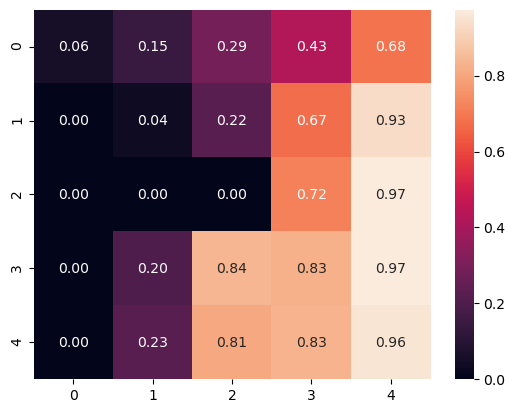

In [30]:
class State:
    # Inicializa estado do jogo
    def __init__(self, state=START, matrix_game=MATRIX_GAME):

        # Matriz inicial de recompensas:
        self.ini_reward_matrix = matrix_game

        # Cria tabuleiro zerado com quantidade de colunas e linhas determinado
        self.board = np.zeros([self.ini_reward_matrix.shape[0], self.ini_reward_matrix.shape[1]])

        # Define locais com obstaculos
        i=0
        while i<= self.ini_reward_matrix.shape[0]-1:
            j=0
            while j <= self.ini_reward_matrix.shape[1]-1:
                if self.ini_reward_matrix[i, j]==-100:
                    self.board[i, j]=-100
                j+=1
            i+=1

        # Define o estado do jogo atual. Inicialmente é igual ao parâmetro START
        self.state = state

        # Define variável de termino do jogo como False
        self.isEnd = False

    # Caso perca ou ganhe o jogo, atualiza o estado para fim
    def isEndFunc(self, count):
        if count == 0:
            self.isEnd = True

    # Verifica posição na matriz com base na ação
    def nxtPosition(self, action):
        """
        action: up, down, left, right

        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position
        """
        if action == "up":
            nxtState = (self.state[0] - 1, self.state[1])
        elif action == "down":
            nxtState = (self.state[0] + 1, self.state[1])
        elif action == "left":
            nxtState = (self.state[0], self.state[1] - 1)
        else:
            nxtState = (self.state[0], self.state[1] + 1)

        # Se estado é legal, próximo estado, caso contrário, permanece no mesmo
        if (nxtState[0] >= 0) and (nxtState[0] <= (self.ini_reward_matrix.shape[0] -1)):
            if (nxtState[1] >= 0) and (nxtState[1] <= (self.ini_reward_matrix.shape[1] -1)):
                if self.board[nxtState]!= -100:
                    return nxtState
        return self.state

    # Mostra tabuleiro
    def showBoard(self):
        self.board[self.state] = 1
        for i in range(0, self.ini_reward_matrix.shape[0]):
            print('-----------------')
            out = '| '
            for j in range(0, self.ini_reward_matrix.shape[1]):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -100:
                    token = 'z'
                if self.board[i, j] == 0:
                    token = '0'
                if self.ini_reward_matrix[i,j]>0:
                    token = 't'
                out += token + ' | '
            print(out)
        print('-----------------')
    # Mostra tabuleiro
    def showBoard(self):
        self.board[self.state] = 1
        for i in range(0, self.ini_reward_matrix.shape[0]):
            print('-----------------')
            out = '| '
            for j in range(0, self.ini_reward_matrix.shape[1]):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -100:
                    token = 'z'
                if self.board[i, j] == 0:
                    token = '0'
                if self.ini_reward_matrix[i,j]>0:
                    token = 't'
                out += token + ' | '
            print(out)
        print('-----------------')
    def showMatrix(self):
        sns.heatmap(self.ini_reward_matrix, vmin=-1, vmax=1, annot=True)
        

# Agent of player

class Agent:

    def __init__(self, matrix_game=MATRIX_GAME):

        # Matriz inicial com recompensas pré definidas:
        self.ini_reward_matrix = matrix_game

        # Contador de números maiores que 0 que ainda não foram percorridos
        self.count = (self.ini_reward_matrix[self.ini_reward_matrix>0]).shape[1]

        # Inicializa vetor de estados
        self.states = [START]

        # Recompensa Total
        self.total_reward = 0

        # Inicializa vetor de ações
        self.actions = ["up", "down", "left", "right"]

        # Inicializa classe estado
        self.State = State()

        # Define lr e exp_rate
        self.lr = 0.2 # Learning Rate: Grau de atualização de peso para estado/ação atual
        self.exp_rate = 0.3 # Exploration Rate: Percentual de vezes em que é tomada uma ação aleatória ao invés de seguir ação de maior recompensa na tabela Q
        self.gamma = 0.95 # Gamma: Define o quanto a proxima recompensa na matriz Q é relevante para atualização do estado/ação atual
        self.d_f = 0.99 # d_f: grau de redução de recompensas futuras baseadas em relação a quantidade de passos

        # Inicializa tabela Q
            # Cria listas para cada item da coluna e da linha e combina cada item em tuplas:
        unique_combinations=list(itertools.product(np.arange(0, self.ini_reward_matrix.shape[0], 1), np.arange(0, self.ini_reward_matrix.shape[1], 1)))
            # Cria tabela q zerada:
        self.qtable = pd.DataFrame(np.zeros((self.ini_reward_matrix.shape[1]*self.ini_reward_matrix.shape[0], len(self.actions))), index=unique_combinations, columns=self.actions)

        #Inicializa tabela R
            # Cria tabela de recompensas imediatas:
        self.rtable = pd.DataFrame(np.zeros((self.ini_reward_matrix.shape[1]*self.ini_reward_matrix.shape[0], len(self.actions))), index=unique_combinations, columns=self.actions)
            # Enriquece tabela r com recompensas imediatas pre definidas:
        for position in self.rtable.index:
            #up
            if position[0]!=0: #Se movimento for valido
                self.rtable.loc[position, 'up'] = self.ini_reward_matrix[position[0]-1, position[1]]
            #down
            if position[0]<self.ini_reward_matrix.shape[0]-1: #Se movimento for valido
                self.rtable.loc[position, 'down'] = self.ini_reward_matrix[position[0]+1, position[1]]
            #right
            if position[1]<self.ini_reward_matrix.shape[1]-1: #Se movimento for valido
                self.rtable.loc[position, 'right'] = self.ini_reward_matrix[position[0], position[1]+1]
            #left
            if position[1]!=0: #Se movimento for valido
                self.rtable.loc[position, 'left'] = self.ini_reward_matrix[position[0], position[1]-1]

        # Cria tabela de função de valor zerada:
        self.vtable = pd.DataFrame(np.zeros((self.ini_reward_matrix.shape[0], self.ini_reward_matrix.shape[1])))

        # Vetor com recompensas. Inicializa com recompensa referente ao início do jogo
        self.rewards = [float(self.ini_reward_matrix[START])]

        # Listas em que serão armazenadas principais informações
        self.game_list = []
        self.time_steps_list = []
        self.time_list = []
        self.states_list = []
        self.total_rewards_list = []
        self.rewards_list = []
        self.vtable_list = []
        self.qtable_list = []
        self.state_reward_list = []

        # Inicializa tempo
        self.t1=time.time()

        self.isEnd = False
    # Escolhe uma ação
    def chooseAction(self):
        # Inicializa variáveis
        mx_nxt_reward = 0
        action = ""

        # Se valor aleatório for menor que taxa de exp_rate escolhida, escolhe ação aleatória
        if np.random.uniform(0, 1) <= self.exp_rate:  
            # Escolhe ação aleatória
            action = np.random.choice(self.actions)

        # Caso contrário, escolhe ação de acordo com estado com maior valor
        else:
            # Seleciona ação que maximiza tabela Q
            # Greedy action
            mx_nxt_reward=0
            for a in self.actions:
                # verifica estado com maior valor e seleciona ação correspondente
                nxt_reward = float(self.qtable.loc[[self.State.state]][a])
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward

        # Caso tenham duas ou mais ações empatadas com maior valor, escolhe uma aleatoriamente
            equal_actions=[]
            for a in self.actions:
                # Verifica estado com maior valor e seleciona ação correspondente
                nxt_reward = float(self.qtable.loc[[self.State.state]][a])
                if nxt_reward == mx_nxt_reward:
                    equal_actions.append(a)
            action = np.random.choice(equal_actions)
        return action

    # Realiza ação
    def takeAction(self, action):
        # Altera posição atual com base na ação tomada
        position = self.State.nxtPosition(action)

        # Retorna a posição atual, depois de realizar ação
        return State(state=position)
    
    def isEndFunc(self):
        # Caso estado atual seja maior que 0 e ainda não tenha sido percorrido, reduz contador em 1
        if (self.State.state not in self.states[:-1]) and (self.ini_reward_matrix[self.State.state]>0):
            self.count-=1

        # Se contador é igual a zero, jogo termina
        if self.count == 0:
            self.isEnd = True

    # Update Q table
    def updateQtable(self, action):
        # Caso já tenha passado por esse estado previamente, considera recompensa como zero
        if self.State.nxtPosition(action) in (self.states):
            r=0
        else:
            # Realiza update na tabela Q usando recompensa descontada pela quantidade de passos realizados
            r = float(self.rtable.loc[[self.State.state]][action])*(self.d_f**(len(self.states)-1))

        # Realiza update no vetor de recompensas
        self.rewards.append(r)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        self.qtable.at[self.State.state, action] = self.qtable.loc[[self.State.state]][action]+ \
                                            self.lr * (r + self.gamma * np.max(self.qtable.loc[[self.State.nxtPosition(action)]].values) - \
                                                self.qtable.loc[[self.State.state]][action])

    def calculateValuefunc(self):
        # Cria tabela com função de valor zerada
        self.vtable = pd.DataFrame(np.zeros((matrix_extra_simple.shape[0], matrix_extra_simple.shape[1])))

        # Enriquece tabela de função de valor com valores máximos da tabela q
        for row in self.qtable.index:
            self.vtable.at[row[0], row[1]] = np.max(self.qtable.loc[[row]].values)
        return self.vtable
    
    # Reinicia o jogo
    def reset(self):
        # Reinicia listas de estados percorridos e recompesas 
        self.states = [START]
        self.rewards = [float(self.ini_reward_matrix[START])]
        self.state_reward_dict=[]
        self.total_reward = 0

        #Reinicia classe de estado
        self.State = State()
        # Reinicia contador de números maiores que 0 que ainda não foram percorridos
        self.count = (self.ini_reward_matrix[self.ini_reward_matrix>0]).shape[1]
        # Reinicia tempo de cada jogo
        self.t1 = time.time()

        self.isEnd = False

    # Salva informações de cada jogo em listas
    def save_info(self, i, time):

        # Armazena número do jogo em lista
        self.game_list.append(i)

        # Armazena quantidade de passos percorridos em lista
        self.time_steps_list.append(len(self.states))

        # Armazena tempo total de cada jogo em lista
        self.time_list.append(time)

        # Armazena lista de estados percorridos em lista
        self.states_list.append(self.states)

        # Armazena recompensa total do jogo em lista
        self.total_rewards_list.append(np.sum(self.rewards))

        # Armazena recompensas de cada estado em lista
        self.rewards_list.append(self.rewards)

        # Armazena vtable em lista 
        self.vtable_list.append(self.calculateValuefunc().to_dict('dict'))

        # Armazena tabela Q em lista
        self.qtable_list.append(self.qtable.to_dict('dict'))

        # Armazena cada par de estado/recompensa em lista de listas
        self.state_reward_dict = list(zip(self.states, self.rewards))
        self.state_reward_list.append(self.state_reward_dict)

    def generate_result_file(self):

        # Cria dataframe e armazena listas com info de cada jogo em colunas
        arquivo_final = pd.DataFrame()
        arquivo_final['JOGO'] = self.game_list
        arquivo_final['TIMESTEPS'] = self.time_steps_list
        arquivo_final['TIME'] = self.time_list
        arquivo_final['STATES'] = self.states_list
        arquivo_final['REWARDS'] = self.rewards_list
        arquivo_final['STATES_REWARDS'] = self.state_reward_list      
        arquivo_final['TOTAL REWARDS'] = self.total_rewards_list
        arquivo_final['Vtable'] = self.vtable_list
        arquivo_final['Qtable'] = self.qtable_list

        # Exporta resultado para arquivo csv
        arquivo_final.to_csv(r'Resultado_RL_Q_Learning\resultados_q_learning.csv', sep=';')

    def play(self, rounds=10):
        # Inicializa contador de jogos
        i = 0

        # Joga n partidas
        while i < rounds:
            if self.isEnd==False:

                # Escolhe uma ação
                action = self.chooseAction()

                #Update na tabela Q
                self.updateQtable(action)

                # appenda no vetor de estados
                self.states.append(self.State.nxtPosition(action))

                # Realiza a ação, atualiza o estado
                self.State = self.takeAction(action)

                # Reduz contador caso estado atual>0. Caso contador=0, jogo termina
                self.isEndFunc()

            if self.isEnd==True:
                #Finaliza tempo de duração do jogo
                duracao_jogo = (time.time()-self.t1)

                #Printa tempo
                print('game ' ,i, ' ended in:')
                print(duracao_jogo)

                # Salva informações em listas
                self.save_info(i=i, time=duracao_jogo)

                # Reseta jogo atual e segue para próximo jogo
                self.reset()
                i += 1
        
        # Gera Arquivo com Resultados
        self.generate_result_file()

    # Mostra resultados em formato de heatmap
    def showValues(self):
        sns.heatmap(self.calculateValuefunc(), annot=True, fmt=".2f")
        print(self.calculateValuefunc())

if __name__ == "__main__":
    ag = Agent()
    ag.play(20)
    print(ag.showValues())

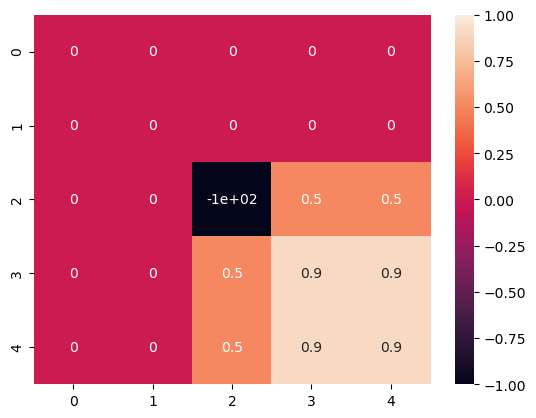

In [31]:
ag.State.showMatrix()

In [ ]:
#TESTE TESTE